In [1]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
log_path = "bs16.log"  # Change path if needed
with open(log_path, "r") as f:
    log_data = f.read()

In [3]:
client_summary_pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),AVG_LOSS:([\d.]+),AVG_ACCURACY:([\d.]+),AVG_TIME:([\d.]+),AVG_MEMORY:[\d.]+MB"
)

# Data structure to accumulate stats
client_stats = defaultdict(lambda: {"rounds": 0, "accuracy": [], "loss": [], "time": []})

# Extract values
for match in client_summary_pattern.finditer(log_data):
    cid = int(match.group(1))
    round_num = int(match.group(2))
    avg_loss = float(match.group(4))
    avg_acc = float(match.group(5))
    avg_time = float(match.group(6))

    client_stats[cid]["rounds"] += 1
    client_stats[cid]["accuracy"].append(avg_acc)
    client_stats[cid]["loss"].append(avg_loss)
    client_stats[cid]["time"].append(avg_time)

# Build a summary list
summary = []
for cid, stat in client_stats.items():
    rounds = stat["rounds"]
    mean_acc = sum(stat["accuracy"]) / rounds
    mean_loss = sum(stat["loss"]) / rounds
    mean_time = sum(stat["time"]) / rounds
    summary.append((cid, rounds, mean_acc, mean_loss, mean_time))

# Sort clients by average accuracy (descending)
summary.sort(key=lambda x: x[2], reverse=True)

# Print top 5 contributors
print("Top 5 Clients by Average Accuracy:")
print("ClientID | Rounds | Avg Accuracy | Avg Loss | Avg Train Time")
for row in summary[:5]:
    print(f"{row[0]:>8} | {row[1]:>6} | {row[2]:>12.2f} | {row[3]:>8.4f} | {row[4]:>14.4f}")


Top 5 Clients by Average Accuracy:
ClientID | Rounds | Avg Accuracy | Avg Loss | Avg Train Time
      11 |      7 |        85.96 |   0.6283 |         0.1070
       6 |      2 |        83.59 |   0.5642 |         0.0901
       4 |      2 |        79.53 |   0.8506 |         0.1242
       8 |      2 |        79.06 |   1.0312 |         0.0921
      10 |      2 |        74.86 |   1.5690 |         0.0902


In [7]:
for row in summary:
    print(f"{row[0]:>8} | {row[1]:>6} | {row[2]:>12.2f} | {row[3]:>8.4f} | {row[4]:>14.4f}")

      11 |      7 |        85.96 |   0.6283 |         0.1070
       6 |      2 |        83.59 |   0.5642 |         0.0901
       4 |      2 |        79.53 |   0.8506 |         0.1242
       8 |      2 |        79.06 |   1.0312 |         0.0921
      10 |      2 |        74.86 |   1.5690 |         0.0902
       5 |      1 |        64.58 |   1.5263 |         0.0946
       1 |      2 |        58.91 |   1.4876 |         0.0920
       0 |      4 |        50.23 |   1.5977 |         0.0896
       7 |      2 |        41.00 |   1.5393 |         0.0956
       2 |      1 |        40.53 |   2.4395 |         0.0920
       3 |      5 |        39.24 |   1.6192 |         0.0884


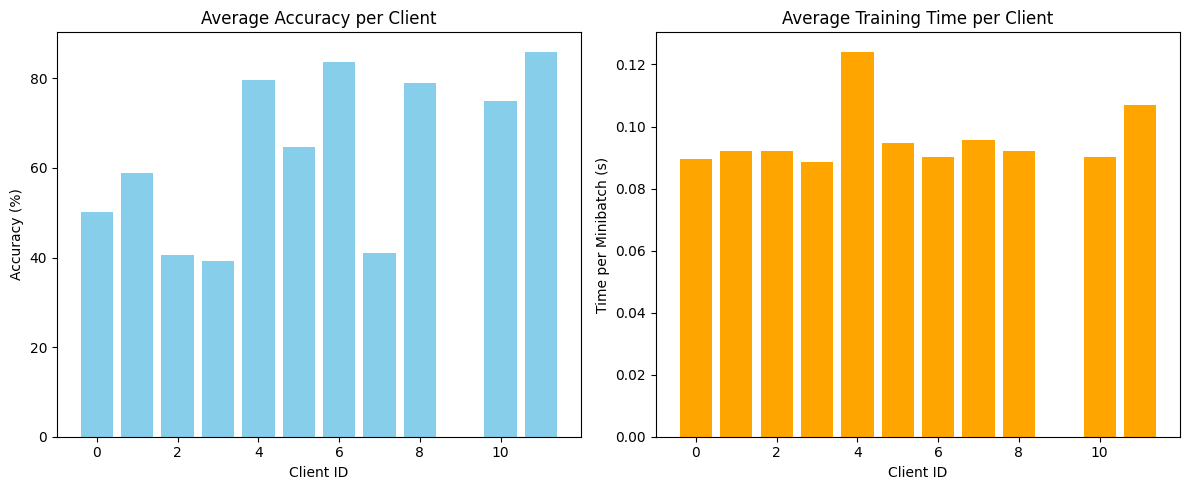

In [5]:
client_ids = [s[0] for s in summary]
avg_accuracies = [s[2] for s in summary]
avg_times = [s[4] for s in summary]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(client_ids, avg_accuracies, color='skyblue')
plt.title("Average Accuracy per Client")
plt.xlabel("Client ID")
plt.ylabel("Accuracy (%)")

plt.subplot(1, 2, 2)
plt.bar(client_ids, avg_times, color='orange')
plt.title("Average Training Time per Client")
plt.xlabel("Client ID")
plt.ylabel("Time per Minibatch (s)")

plt.tight_layout()
plt.show()